# Inference on GD-1 with Gaia and PanSTARRS data

In [1]:
import hypothesis
import numpy as np
import matplotlib.pyplot as plt
import torch
import palettable
import glob

from hypothesis.stat import highest_density_level
from hypothesis.visualization.util import make_square
from matplotlib.colors import LogNorm
from sklearn.neighbors import KernelDensity
from plotting import compute_1d_profile_likelihood
from plotting import compute_2d_profile_likelihood
from plotting import compute_1d_pdf
from plotting import compute_2d_pdf
from plotting import compute_1d_pdf_abc
from plotting import compute_2d_pdf_abc
from plotting import plot_1d_profile_likelihood
from plotting import plot_2d_profile_likelihood
from plotting import plot_1d_confidence_level
from plotting import plot_1d_confidence_levels
from plotting import plot_2d_confidence_level
from plotting import plot_2d_confidence_levels
from plotting import plot_1d_pdf
from plotting import plot_2d_pdf
from plotting import plot_1d_pdf_std
from plotting import plot_1d_contours
from plotting import plot_2d_contours
from plotting import plot_stream
from ratio_estimation import RatioEstimator
from tqdm import tqdm
from util import load_ratio_estimator

cmap = palettable.scientific.sequential.Oslo_3.mpl_colormap

## Load the pretrained ratio estimators

In [2]:
query = "out/coverage/4096/marginalized/selu/*ratio-estimator-resnet-50-*/best-model.th"

r_1d = load_ratio_estimator(query, normalize_inputs=False)

In [3]:
query = "out/coverage/4096/not-marginalized/selu/*ratio-estimator-resnet-50-*/best-model.th"

r_2d = load_ratio_estimator(query, normalize_inputs=False)

## Globals

In [4]:
datadir = "../experiment-simulations/data"   # Root directory containing the generated and observed data
phi = np.load(datadir + "/phi-cut.npy")      # Linear angle

## Observed GD-1

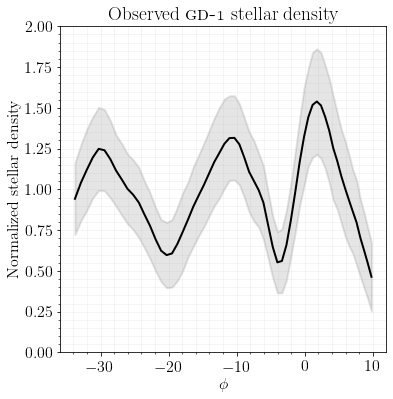

In [5]:
observed_noisy = np.load(datadir + "/observed-noised.npy")

mean_observed = np.mean(observed_noisy, axis=0)
std_observed = 2 * np.std(observed_noisy, axis=0) # 95%

figure, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.plot(phi, mean_observed, lw=2, color="black")
#for _ in range(5):
#    index = np.random.randint(0, 1000)
#    density = observed_noisy[index]
#    plt.plot(phi, density, lw=2, color="black", alpha=.25)
plt.fill_between(phi, mean_observed - std_observed, mean_observed + std_observed, lw=2, color="black", alpha=.10)
plt.ylim([0, 2])
plt.minorticks_on()
m = np.mean(observed_noisy, axis=0)
plt.title(r"Observed \textsc{gd-}\oldstylenums{1} stellar density")
plt.grid(True, which="both", alpha=.15)
plt.ylabel("Normalized stellar density")
plt.xlabel(r"$\phi$")
plt.gca().set_xticks([-30, -20, -10, 0, 10])
make_square(plt.gca())
figure.savefig("plots/gd1.pdf", bbox_inches="tight")
plt.show()

observed_noisy = torch.from_numpy(observed_noisy).float()

## Area under posterior diagnostic

In [6]:
x = np.load("out/gd1/integrand-resnet-50-marginalized.npy")

print(np.mean(x))
print(np.std(x))

0.96106652375035
0.011333328446383692


# Bayesian

### Approximate Bayesian Computation

In [7]:
bins = 50

#### ABC-A

228240


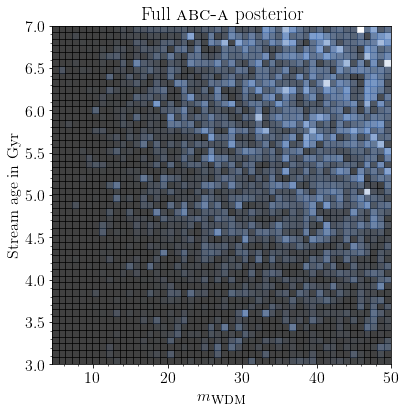

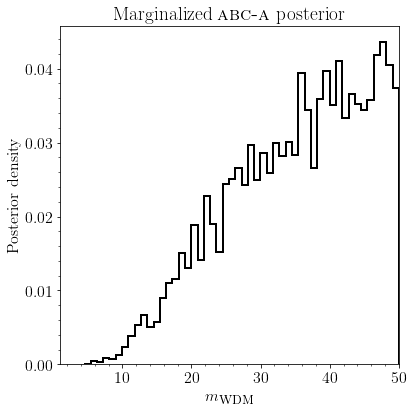

In [8]:
paths = glob.glob("out/gd1/abc-0*/samples.npy")
samples = []
for p in paths:
     samples.append(np.load(p).reshape(-1, 2))
posterior_samples = np.vstack(samples)
posterior_samples_a = posterior_samples
print(len(posterior_samples))

figure, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.title(r"Full $\textsc{abc-a}$ posterior")
plt.hist2d(posterior_samples[:,0], posterior_samples[:,1], bins=bins, cmap=cmap, alpha=.75)
plt.minorticks_on()
plt.xlabel(r"$m_{\textsc{wdm}}$")
plt.xticks([10, 20, 30, 40, 50])
plt.yticks([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
plt.ylabel("Stream age in Gyr")
make_square(plt.gca())
figure.tight_layout()
figure.savefig("plots/posterior-gd1-abc-a-2d.pdf", bbox_inches="tight")
plt.show()

figure, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.title(r"Marginalized $\textsc{abc-a}$ posterior")
plt.hist(posterior_samples[:,0], bins=bins, histtype="step", lw=2, color="black", density=True)
plt.minorticks_on()
plt.xlabel(r"$m_{\textsc{wdm}}$")
plt.ylabel("Posterior density")
plt.xlim([1, 50])
make_square(plt.gca())
figure.tight_layout()
figure.savefig("plots/posterior-gd1-abc-a-1d.pdf", bbox_inches="tight")
plt.show()

#### ABC-B

2095816


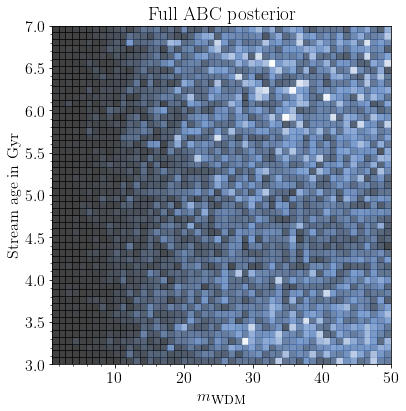

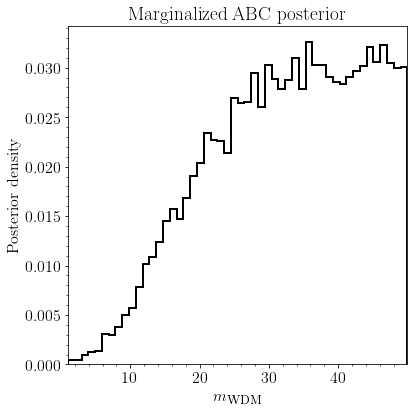

In [9]:
paths = glob.glob("out/gd1/abc-new-0*/samples.npy")
samples = []
for p in paths:
     samples.append(np.load(p).reshape(-1, 2))
posterior_samples = np.vstack(samples)
posterior_samples_b = posterior_samples
print(len(posterior_samples))

figure, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.title(r"Full ABC posterior")
plt.hist2d(posterior_samples[:,0], posterior_samples[:,1], bins=bins, cmap=cmap, alpha=.75)
plt.minorticks_on()
plt.xlabel(r"$m_{\textsc{wdm}}$")
plt.xticks([10, 20, 30, 40, 50])
plt.yticks([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
plt.ylabel("Stream age in Gyr")
make_square(plt.gca())
figure.tight_layout()
figure.savefig("plots/posterior-gd1-abc-b-2d.pdf", bbox_inches="tight")
plt.show()

figure, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.title(r"Marginalized ABC posterior")
plt.hist(posterior_samples[:,0], bins=bins, histtype="step", lw=2, color="black", density=True)
plt.minorticks_on()
plt.xlabel(r"$m_{\textsc{wdm}}$")
plt.ylabel("Posterior density")
plt.xlim([1, 49.9])
make_square(plt.gca())
figure.tight_layout()
figure.savefig("plots/posterior-gd1-abc-b-1d.pdf", bbox_inches="tight")
plt.show()

In [10]:
np.percentile(posterior_samples_b[:, 0], 5 / 2)

10.892343521118164

In [11]:
np.percentile(posterior_samples_b[:, 0], 0.3 / 2, interpolation="midpoint")

3.5645592212677

2095816


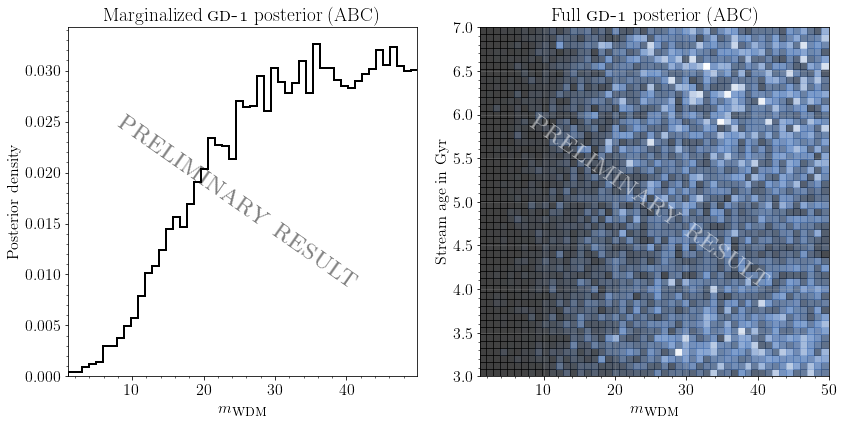

In [12]:
paths = glob.glob("out/gd1/abc-new-0*/samples.npy")
samples = []
for p in paths:
     samples.append(np.load(p).reshape(-1, 2))
posterior_samples = np.vstack(samples)
posterior_samples_b = posterior_samples
print(len(posterior_samples))

figure, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ax.set_title(r"Marginalized $\textsc{gd-}\oldstylenums{1}$ posterior (ABC)")
ax.hist(posterior_samples[:,0], bins=bins, histtype="step", lw=2, color="black", density=True)
ax.minorticks_on()
ax.set_xlabel(r"$m_{\textsc{wdm}}$")
ax.set_ylabel("Posterior density")
ax.set_xlim([1, 49.9])
ylim = ax.get_ylim()
ax.text(25, (ylim[0] + ylim[1]) / 2, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="black", alpha=.5, size=30, ha="center", va="center", zorder=1)
make_square(ax)

ax = axes[1]
ax.set_title(r"Full $\textsc{gd-}\oldstylenums{1}$ posterior (ABC)")
ax.hist2d(posterior_samples[:,0], posterior_samples[:,1], bins=bins, cmap=cmap, alpha=.75)
ax.minorticks_on()
ax.grid(True, alpha=.25)
ax.set_xlabel(r"$m_{\textsc{wdm}}$")
ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
ax.set_ylabel("Stream age in Gyr")
make_square(ax)

figure.tight_layout()
figure.savefig("plots/posterior-gd1-abc.pdf", bbox_inches="tight")
plt.show()

### GD-1 posteriors

#### Marginalized over the stream age

In [13]:
pdf_mean_1d, pdf_std_1d = compute_1d_pdf(r_1d, observed_noisy, median=False)

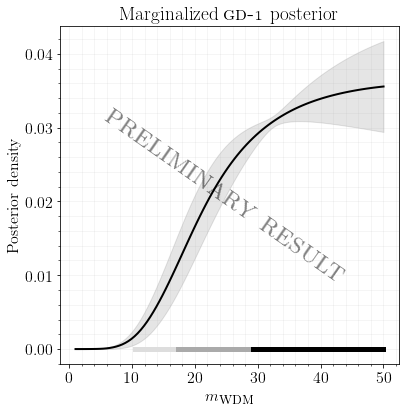

In [14]:
figure, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_1d_contours(ax, pdf_mean_1d)
plot_1d_pdf(ax, pdf_mean_1d)
ax.fill_between(np.linspace(1, 50, 100), pdf_mean_1d - pdf_std_1d, pdf_mean_1d + pdf_std_1d, color="black", alpha=.1)
x = np.linspace(1, 50, 100)
ax.set_ylabel("Posterior density")
ax.set_title(r"Marginalized \textsc{gd-}\oldstylenums{1} posterior")
ylim = ax.get_ylim()
ax.text(25, (ylim[0] + ylim[1]) / 2, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="black", alpha=.5, size=30, ha="center", va="center", zorder=1)
make_square(ax)
figure.tight_layout()
figure.savefig("plots/posterior-gd1-1d.pdf", bbox_inches="tight")
figure.show()

#### Posterior over the stream age and the mass

In [15]:
pdf_mean_2d, pdf_std_2d = compute_2d_pdf(r_2d, observed_noisy, median=False)

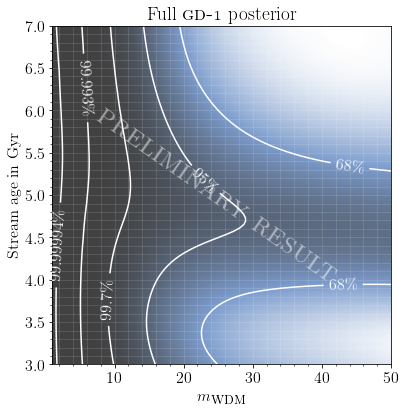

In [16]:
figure, ax = plt.subplots(1, 1, figsize=(6, 6))
p = pdf_mean_2d 
plot_2d_contours(ax, p)
plot_2d_pdf(ax, p)
ax.set_title(r"Full \textsc{gd-}\oldstylenums{1} posterior")
ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
figure.tight_layout()
figure.savefig("plots/posterior-gd1-2d.pdf", bbox_inches="tight")
figure.show()

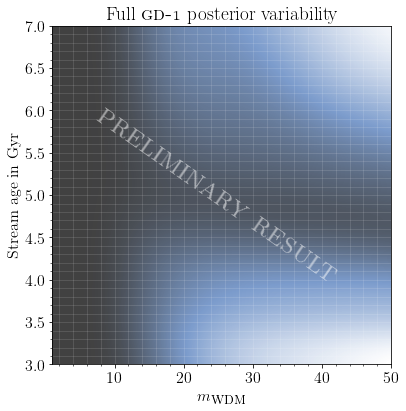

In [17]:
figure, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_2d_pdf(ax, np.log(1 + pdf_std_2d))
ax.set_title(r"Full \textsc{gd-}\oldstylenums{1} posterior variability")
ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
figure.tight_layout()
figure.savefig("plots/posterior-gd1-2d-std.pdf", bbox_inches="tight")
figure.show()

### 1D joint plot with ABC analyses

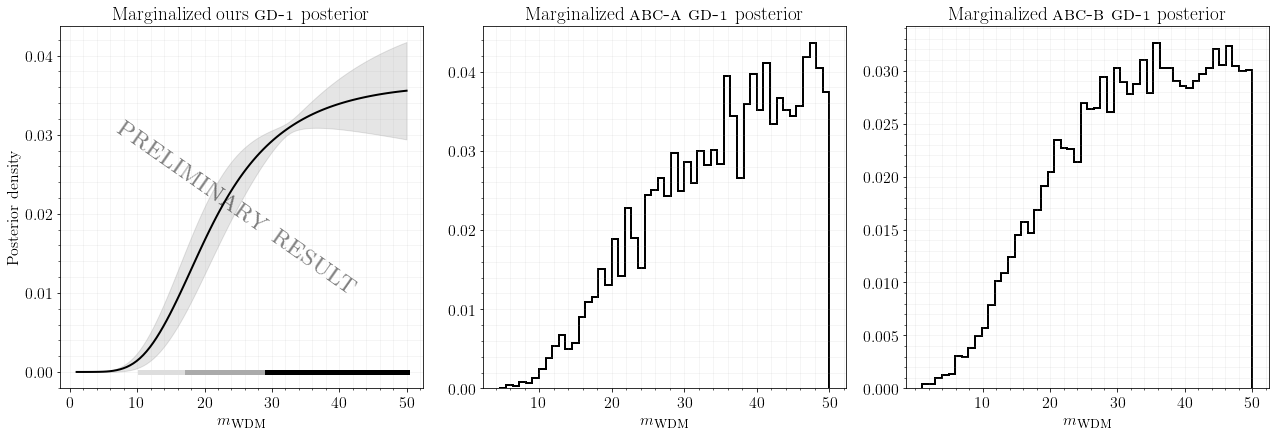

In [18]:
figure, axes = plt.subplots(1, 3, figsize=(6 * 3, 6))

# Plot ours
ax = axes[0]
plot_1d_contours(ax, pdf_mean_1d)
plot_1d_pdf(ax, pdf_mean_1d)
ax.fill_between(np.linspace(1, 50, 100), pdf_mean_1d - pdf_std_1d, pdf_mean_1d + pdf_std_1d, color="black", alpha=.1)
x = np.linspace(1, 50, 100)
ax.set_ylabel("Posterior density")
ax.set_title(r"Marginalized ours \textsc{gd-}\oldstylenums{1} posterior")
ylim = ax.get_ylim()
ax.text(25, (ylim[0] + ylim[1]) / 2, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="black", alpha=.5, size=30, ha="center", va="center", zorder=1)
make_square(ax)

# Plot ABC-A
ax = axes[1]
ax.set_title(r"Marginalized $\textsc{abc-a}$ \textsc{gd-}\oldstylenums{1} posterior")
ax.hist(posterior_samples_a[:,0], bins=bins, histtype="step", lw=2, color="black", density=True)
ax.minorticks_on()
ax.set_xlabel(r"$m_{\textsc{wdm}}$")
ax.set_xticks([10, 20, 30, 40, 50])
ax.grid(True, which="both", alpha=.15)
make_square(ax)

# Plot ABC-B
ax = axes[2]
ax.set_title(r"Marginalized $\textsc{abc-b}$ \textsc{gd-}\oldstylenums{1} posterior")
ax.hist(posterior_samples_b[:,0], bins=bins, histtype="step", lw=2, color="black", density=True)
ax.minorticks_on()
ax.set_xlabel(r"$m_{\textsc{wdm}}$")
ax.set_xticks([10, 20, 30, 40, 50])
ax.grid(True, which="both", alpha=.15)
make_square(ax)

# Save
figure.tight_layout()
figure.savefig("plots/posterior-gd1-all-1d.pdf", bbox_inches="tight")
figure.show()

### 2D joint plot with ABC analyses

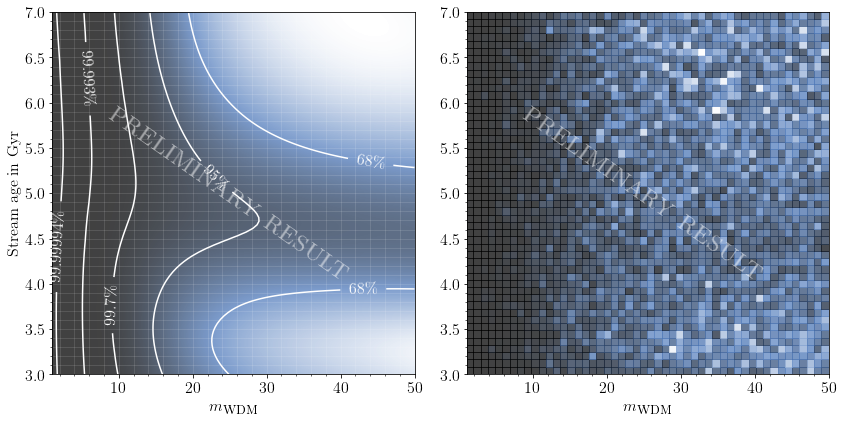

In [19]:
figure, axes = plt.subplots(1, 2, figsize=(6 * 2, 6))

# Plot ours
ax = axes[0]
p = pdf_mean_2d 
plot_2d_contours(ax, p)
plot_2d_pdf(ax, p)
#ax.set_title(r"Full ours \textsc{gd-}\oldstylenums{1} posterior")
ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
make_square(ax)

# Plot ABC-A
#ax = axes[1]
#ax.set_title(r"Full $\textsc{abc-a}$ \textsc{gd-}\oldstylenums{1} posterior")
#ax.hist2d(posterior_samples_a[:,0], posterior_samples_a[:,1], bins=bins, cmap=cmap, alpha=.75, density=True)
#ax.minorticks_on()
#ax.set_xlabel(r"$m_{\textsc{wdm}}$")
#ax.set_xticks([10, 20, 30, 40, 50])
#ax.set_yticks([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
#make_square(ax)

# Plot ABC-B
ax = axes[1]
#ax.set_title(r"Full $\textsc{abc-b}$ \textsc{gd-}\oldstylenums{1} posterior")
ax.hist2d(posterior_samples_b[:,0], posterior_samples_b[:,1], bins=bins, cmap=cmap, alpha=.75, density=True)
ax.minorticks_on()
ax.set_xlabel(r"$m_{\textsc{wdm}}$")
ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
make_square(ax)

# Save
figure.tight_layout()
figure.savefig("plots/posterior-gd1-all-2d.pdf", bbox_inches="tight")
figure.show()

### Joint plot

#### Wide

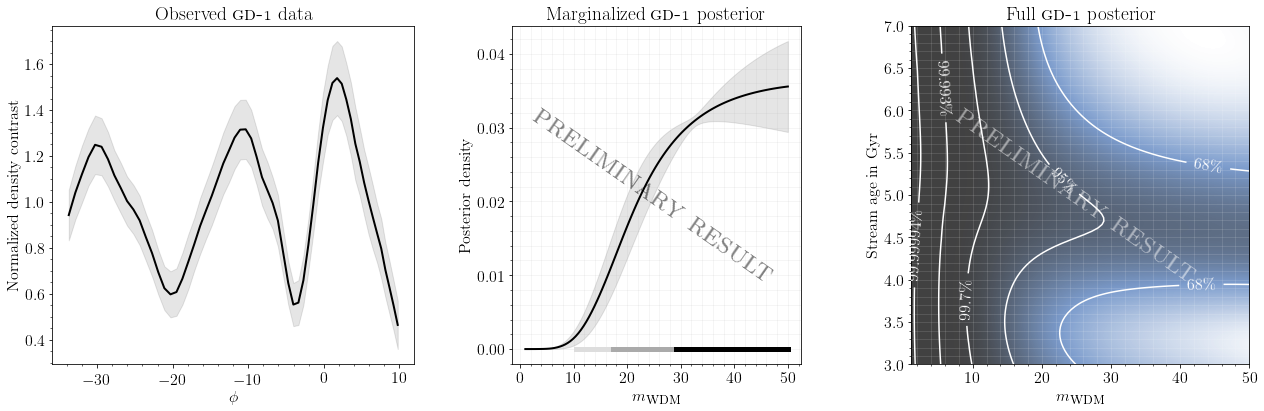

In [20]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))

# Stream
ax = axes[0]
mean = np.mean(observed_noisy.numpy(), axis=0)
std = np.std(observed_noisy.numpy(), axis=0)
ax.plot(phi, mean, color="black", lw=2)
ax.fill_between(phi, mean - std, mean + std, color="black", alpha=.1)
ax.set_ylabel("Normalized density contrast")
ax.set_title(r"Observed \textsc{gd-}\oldstylenums{1} data")
ax.minorticks_on()
ax.set_xticks([-30, -20, -10, 0, 10])
ax.set_xlabel(r"$\phi$")
# Marginalized (1D)
ax = axes[1]
plot_1d_contours(ax, pdf_mean_1d)
plot_1d_pdf(ax, pdf_mean_1d)
ax.fill_between(np.linspace(1, 50, 100), pdf_mean_1d - pdf_std_1d, pdf_mean_1d + pdf_std_1d, color="black", alpha=.1)
ylim = ax.get_ylim()
ax.text(25, (ylim[0] + ylim[1]) / 2, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="black", alpha=.5, size=30, ha="center", va="center", zorder=1)
ax.set_ylabel("Posterior density")
ax.set_title(r"Marginalized \textsc{gd-}\oldstylenums{1} posterior")
# Not marginalized (2D)
ax = axes[2]
ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
plot_2d_contours(ax, pdf_mean_2d)
plot_2d_pdf(ax, pdf_mean_2d)
ax.set_title(r"Full \textsc{gd-}\oldstylenums{1} posterior")

figure.tight_layout()
figure.savefig("plots/posterior-gd1-joint.pdf", bbox_inches="tight")
figure.show()

#### Short

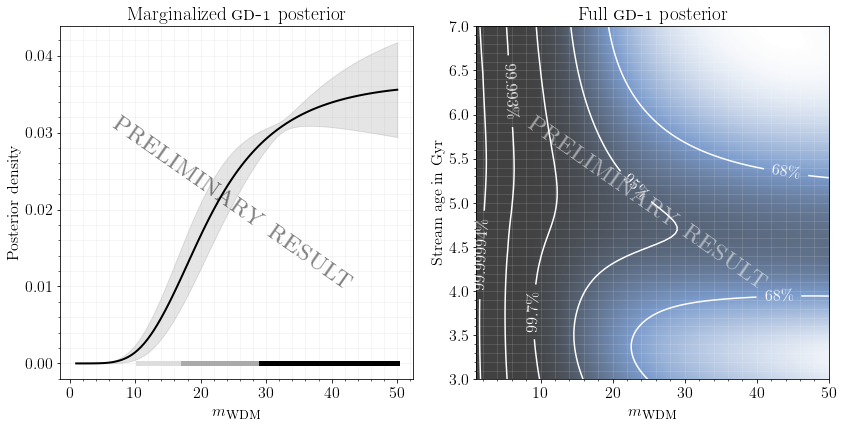

In [21]:
figure, axes = plt.subplots(1, 2, figsize=(12, 6))

# Marginalized (1D)
ax = axes[0]
plot_1d_contours(ax, pdf_mean_1d)
plot_1d_pdf(ax, pdf_mean_1d)
ax.fill_between(np.linspace(1, 50, 100), pdf_mean_1d - pdf_std_1d, pdf_mean_1d + pdf_std_1d, color="black", alpha=.1)
ylim = ax.get_ylim()
ax.text(25, (ylim[0] + ylim[1]) / 2, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="black", alpha=.5, size=30, ha="center", va="center", zorder=1)
ax.set_ylabel("Posterior density")
ax.set_title(r"Marginalized \textsc{gd-}\oldstylenums{1} posterior")
make_square(ax)

# Not marginalized (2D)
ax = axes[1]
ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
plot_2d_contours(ax, pdf_mean_2d)
plot_2d_pdf(ax, pdf_mean_2d)
ax.set_title(r"Full \textsc{gd-}\oldstylenums{1} posterior")
make_square(ax)

figure.tight_layout()
figure.savefig("plots/posterior-gd1-joint-short.pdf", bbox_inches="tight")
figure.show()

## Frequentist

### GD-1 Likelihood-ratio test statistic

#### Marginalized over the stream age

In [22]:
profile_likelihood_1d, std = compute_1d_profile_likelihood(r_1d, observed_noisy, median=False)

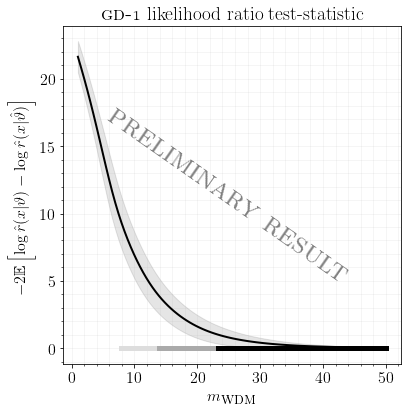

In [23]:
figure, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_1d_profile_likelihood(ax, profile_likelihood_1d)
plot_1d_confidence_levels(ax, profile_likelihood_1d)
ax.set_ylabel(r"$-2\mathbb{E}\left[\log\hat{r}(x\vert\vartheta) - \log\hat{r}(x\vert\hat{\vartheta})\right]$")
ax.fill_between(np.linspace(1, 50, 100), profile_likelihood_1d - std, profile_likelihood_1d + std, color="black", alpha=.1)
ylim = ax.get_ylim()
ax.text(25, (ylim[0] + ylim[1]) / 2, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="black", alpha=.5, size=30, ha="center", va="center", zorder=1)
ax.set_title(r"\textsc{gd-}\oldstylenums{1} likelihood ratio test-statistic")
make_square(ax)
figure.tight_layout()
figure.savefig("plots/profile-likelihood-gd1-1d.pdf", bbox_inches="tight")
figure.show()

#### Full profile likelihood over the stream age and the mass

In [24]:
profile_likelihood_2d, _ = compute_2d_profile_likelihood(r_2d, observed_noisy, median=False)

In [25]:
# Plotting defaults
default_resolution = 100
masses_xticks = [0, 10, 20, 30, 40, 50]
extent = [ # I know, this isn't very nice :(
    1, 50,
    3, 7]

/data/home/joerih/projects/stellar-stream-inference/experiments/experiment-inference/plotting.py:138: UserWarning: No contour levels were found within the data range.
  c = ax.contour(grid_ages.cpu().numpy(), grid_masses.cpu().numpy(), profile_likelihood, [z], colors="white")


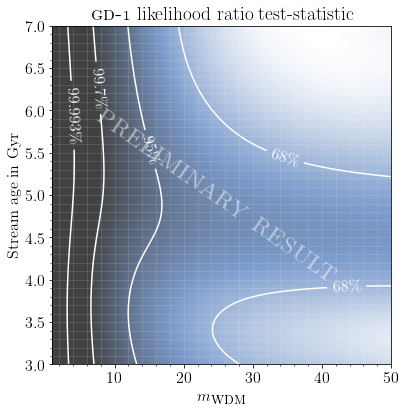

In [26]:
@torch.no_grad()
def plot_2d_profile_likelihood(ax, profile_likelihood, mass=None, age=None):
    ax.minorticks_on()
    resolution = len(profile_likelihood)
    cmap = palettable.scientific.sequential.Oslo_3_r.mpl_colormap
    im = ax.imshow(profile_likelihood.T + 0.0000001, norm=LogNorm(), alpha=.75, interpolation="bilinear", vmax=13, extent=extent, origin="lower", cmap=cmap)
    if mass is not None and age is not None:
        ax.scatter(mass, age, s=150, marker='*', c="#ff4747", alpha=1.0, zorder=10)
    ax.set_xlabel(r"$m_{\textsc{wdm}}$")
    ax.set_xticks([10, 20, 30, 40, 50])
    ax.set_ylabel("Stream age in Gyr")
    ax.grid(True, which="both", alpha=.15, zorder=0, color="white")
    make_square(ax)

figure, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_2d_profile_likelihood(ax, profile_likelihood_2d)
plot_2d_confidence_levels(ax, profile_likelihood_2d)
ax.set_title(r"\textsc{gd-}\oldstylenums{1} likelihood ratio test-statistic")
ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
make_square(ax)
figure.tight_layout()
figure.savefig("plots/profile-likelihood-gd1-2d.pdf", bbox_inches="tight")
figure.show()

## Summary plot with ABC and the likelihood-ratio test statistic

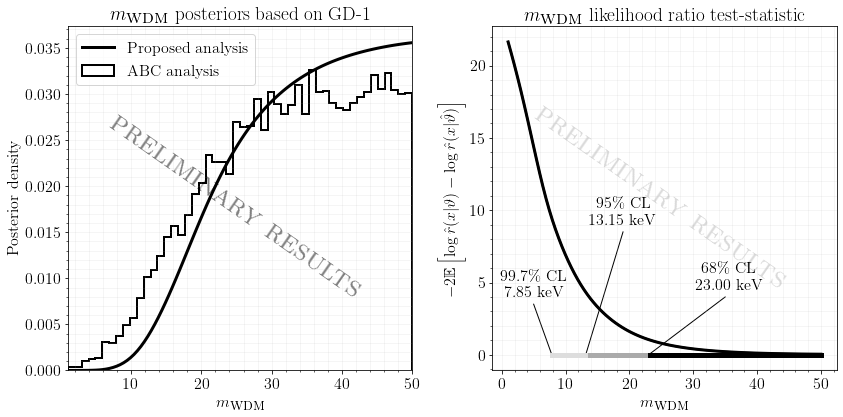

In [29]:
sizing = 1
figure, axes = plt.subplots(1, 2, figsize=(sizing * 12, sizing * 6))

# Bayesian
ax = axes[0]

# Ratio estimator
#plot_1d_contours(ax, pdf_mean_1d)
#plot_1d_pdf(ax, pdf_mean_1d)
ax.plot(np.linspace(1, 50, len(pdf_mean_1d)), pdf_mean_1d, color="black", lw=3, label="Proposed analysis")
#ax.fill_between(np.linspace(1, 50, 100), pdf_mean_1d - pdf_std_1d, pdf_mean_1d + pdf_std_1d, color="black", alpha=.1)
ylim = ax.get_ylim()

# ABC
ax.hist(posterior_samples[:,0], bins=bins, histtype="step", lw=2, color="black", density=True, label="ABC analysis")
ax.minorticks_on()

ax.text(25, (ylim[0] + ylim[1]) / 2, r"\textsc{preliminary results}", rotation_mode="anchor", rotation=-35.0, color="black", alpha=.5, size=30, ha="center", va="center", zorder=1)
ax.set_ylabel("Posterior density")
ax.set_title(r"$m_{\textsc{wdm}}$ posteriors based on GD-1")
ax.set_xlim([1, 50])
ax.set_xlabel(r"$m_{\textsc{wdm}}$")
ax.grid(True, which="both", alpha=.15)
ax.legend()
make_square(ax)

# Frequentist
ax = axes[1]
#ax.text(25, 5, r"\textsc{preliminary result}", rotation_mode="anchor", rotation=-35.0, color="white", alpha=.5, size=30, ha="center", va="center", zorder=1)
#plot_2d_contours(ax, pdf_mean_2d)
#plot_2d_pdf(ax, pdf_mean_2d)
#ax.set_title(r"Full \textsc{gd-}\oldstylenums{1} posterior")
plot_1d_profile_likelihood(ax, profile_likelihood_1d)
plot_1d_confidence_levels(ax, profile_likelihood_1d)
ax.plot(np.linspace(1, 50, len(profile_likelihood_1d)), profile_likelihood_1d, lw=3, color="black")
ax.set_title(r"$m_{\textsc{wdm}}$ likelihood ratio test-statistic")
ax.set_xlabel(r"$m_{\textsc{wdm}}$")
ylim = ax.get_ylim()
ax.text(25, (ylim[0] + ylim[1]) / 2, r"\textsc{preliminary results}", rotation_mode="anchor", rotation=-35.0, color="black", alpha=.15, size=30, ha="center", va="center", zorder=1)

# Put arrows and limits
level_997 = 7.85
level_95 = 13.15
level_68 = 23.0

# 99.7% CL
final_x = 5.0
final_y = 3.5
ax.plot([level_997, final_x], [0, final_y], lw=1, color="black", zorder=1)
ax.text(final_x, final_y + 0.5, '99.7\% CL\n7.85 keV', horizontalalignment="center", multialignment="center")

# 95% CL
final_x = 19.0
final_y = 8.5
ax.plot([level_95, final_x], [0, final_y], lw=1, color="black", zorder=1)
ax.text(final_x, final_y + 0.5, '95\% CL\n13.15 keV', horizontalalignment="center", multialignment="center")

# 68% CL
final_x = 35.0
final_y = 4.0
ax.plot([level_68, final_x], [0, final_y], lw=1, color="black", zorder=1)
ax.text(final_x + 0.5, final_y + 0.5, '68\% CL\n23.00 keV', horizontalalignment="center", multialignment="center")


# Square plot
make_square(ax)

figure.tight_layout()
figure.savefig("plots/gd1-summary.pdf", bbox_inches="tight")
figure.show()